In [1]:
#!g1.1
#BATCH_SIZE = 16 for nVidia Tesla V100

In [2]:
#!g1.1
import sys
import numpy as np
import os
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *


DATA = os.path.join("", "DataSet/Split")
IMAGES = os.path.join("", "images")
LABEL = os.path.join("", "labels")
BATCH_SIZE = 16
path = Path(DATA_PATH)

def label_func(fn):
    return path/"labels"/f"{fn.stem}_m{'.png'}"

/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnet18-f37072fd.pth


epoch,train_loss,valid_loss,foreground_acc,time
0,0.388477,0.278881,0.917576,09:25


epoch,train_loss,valid_loss,foreground_acc,time
0,0.180173,0.162484,0.912736,09:26
1,0.169401,0.139472,0.952175,09:25
2,0.150595,0.127381,0.943958,09:25
3,0.136703,0.122403,0.927022,09:25
4,0.105605,0.117455,0.949994,09:25
5,0.096122,0.113574,0.949002,09:25
6,0.082511,0.106547,0.951042,09:25
7,0.079211,0.108207,0.949430,09:25


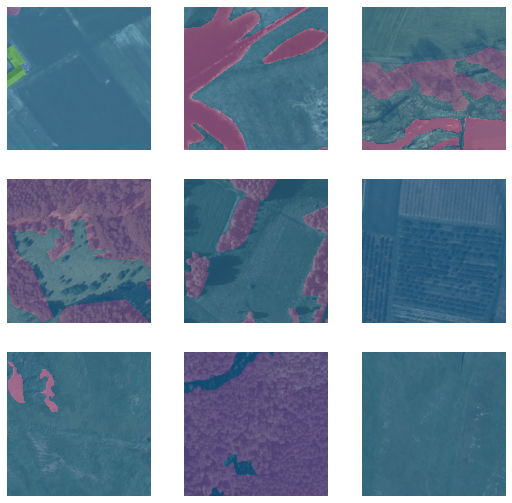

In [3]:
#!g1.1
fnames = get_image_files(path/"images")
codes = np.array(["building", "woodland", "water", "background", "roads"])

dls = SegmentationDataLoaders.from_label_func(
    path, bs=BATCH_SIZE, fnames=fnames, label_func=label_func, codes=codes, device=torch.device('cuda')
)
dls.show_batch()
model = unet_learner(dls, resnet18, metrics=foreground_acc)
model.fine_tune(8)
model.export('nALLe8_with_roads.pkl')


In [4]:
#!g1.1
